# Copy Number Variation

In [1]:
from pylluminator.samples import Samples
from pylluminator.cnv import copy_number_variation, copy_number_segmentation
from pylluminator.utils import set_logger
from pylluminator.visualizations import cns_manhattan_plot

set_logger('WARNING')  # set the verbosity level, can be DEBUG, INFO, WARNING, ERROR

## Load pylluminator Samples

We assume that you have already processed the .idat files according to your preferences and saved them. If not, please refer to notebook `1 - Read data and get beta values` before going any further.

In [2]:
my_samples = Samples.load('preprocessed_samples')
my_samples

Samples object with 6 samples: LNCAP_500_2, LNCAP_500_1, PREC_500_3, PREC_500_2, LNCAP_500_3, PREC_500_1
EPICv2 array - genome version hg38
937,688 probes

In [3]:
sample_sheet = my_samples.sample_sheet
sample_sheet

,sample_id,sample_name,sample_type
0,GSM7698459,PREC_500_3,PREC
1,GSM7698462,LNCAP_500_3,LNCAP
2,GSM7698435,PREC_500_1,PREC
3,GSM7698443,PREC_500_2,PREC
4,GSM7698438,LNCAP_500_1,LNCAP
5,GSM7698446,LNCAP_500_2,LNCAP


## Get CNVs for a sample group

Using the PrEC samples as normalizations samples, we can calculate the Copy Number Variation per probe for LNCaP samples, and group the bins in segments depending on their copy number.

In [4]:
cnv_df = copy_number_variation(my_samples, group_by='sample_type', normalization_labels='PREC')

ranges, signal_bins_df, segments_df = copy_number_segmentation(my_samples, cnv_df, 'LNCAP')

## Visualize CNVs and segments

Plot the identified segments and CNV values

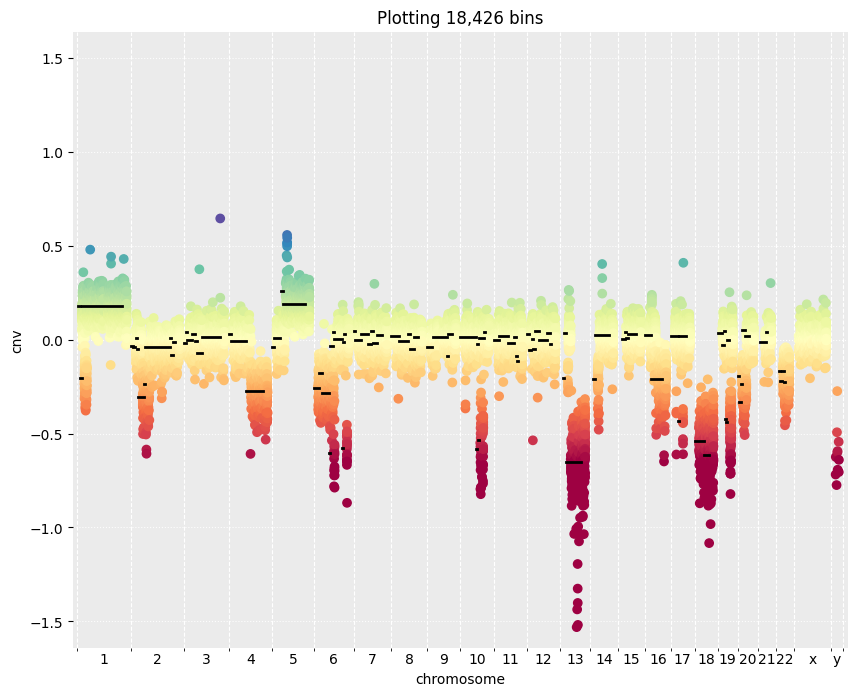

In [5]:
cns_manhattan_plot(signal_bins_df, segments_df)